<a href="https://colab.research.google.com/github/zxb-97/NLP1/blob/main/NLPproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Dataset description




This dataset has been downloaded from [Kaggle](https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products?resource=download&select=1429_1.csv). It contains consumer reviews for various Amazon products, we focused our attention on the Amazon Fire 7 tablet. We modified the dataset by filtering for the single product we were interested in and removed columns we deemed as irrelevant for our task such as ID, review.DidPurchase etc.. The code below produced the dataset we worked with.

In [ ]:
'''

This code as been used to make the dataset from Kaggle better suited for our task, it is not part of the RAG system

'''


import csv
from datetime import datetime

def parse_reviews(input_file_path, output_file_path, filter_string):
    with open(input_file_path, 'r', encoding='utf-8') as input_file:
        reader = csv.DictReader(input_file)

        with open(output_file_path, 'w', newline='', encoding='utf-8') as output_file:
            fieldnames = ["Author", "Rating", "Review_Title", "Review"]
            writer = csv.DictWriter(output_file, fieldnames=fieldnames)
            writer.writeheader()

            for row in reader:
                if filter_string in row['name']:

                    author = row["reviews.username"]
                    rating = row["reviews.rating"]
                    review_title = row["reviews.title"]
                    review = row["reviews.text"]


                    writer.writerow({

                        "Author": author,
                        "Rating": rating,
                        "Review_Title": review_title,
                        "Review": review,

                    })

# Define input and output file paths
input_file_path = 'amazon.csv'
output_file_path = 'parsedReviews.csv'

# Define the filter string
filter_string = 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers'

# Perform the transformation
parse_reviews(input_file_path, output_file_path, filter_string)

# Getting the dataset from github


In [1]:

import requests
import pandas as pd

#TODO :

# Add brief description of domain and dataset


# The file is downloaded from our github
url = "https://raw.githubusercontent.com/zxb-97/NLP1/main/parsedReviews.csv"

filename = "parsedReviews.csv"

# Send a GET request to the URL
response = requests.get(url)

#Check is request worked
if response.status_code == 200:
  with open(filename,"wb") as file:
    file.write(response.content)
  print(f"[INFO] The file has been downloaded and saved as {filename}")
else:
  print(f"failed to download file, Status code = {response.status_code}")

# Load the CSV file into a Pandas DataFrame for dataset profiling
df = pd.read_csv('parsedReviews.csv')




[INFO] The file has been downloaded and saved as parsedReviews.csv


# Dataset profiling

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


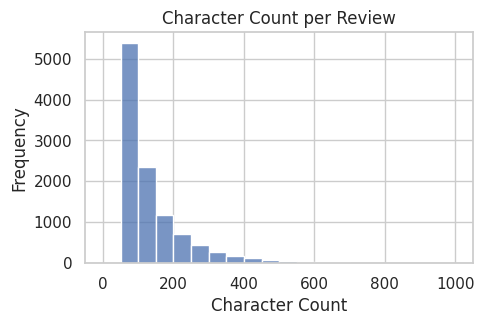

,Rating,word_count,char_count,sentence_count,token_count,total_tokens
count,10962.000000,10966.000000,10966.000000,10966.000000,10966.000000,10966.000000
mean,4.453293,28.323819,146.448842,2.476746,31.962247,31.962429
std,0.801797,28.763018,151.731519,1.773997,32.529663,32.530445
min,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000
25%,4.000000,13.000000,68.000000,1.000000,15.000000,15.000000
50%,5.000000,20.000000,101.000000,2.000000,22.000000,22.000000
75%,5.000000,33.000000,167.000000,3.000000,37.000000,37.000000
max,5.000000,578.000000,3097.000000,37.000000,678.000000,678.000000


from matplotlib import pyplot as plt
_df_0['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['word_count'].plot(kind='hist', bins=20, title='word_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['char_count'].plot(kind='hist', bins=20, title='char_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sentence_count'].plot(kind='hist', bins=20, title='sentence_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Rating', y='word_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='word_count', y='char_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='char_count', y='sentence_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='sentence_count', y='token_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['char_count'].plot(kind='line', figsize=(8, 4), title='char_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['sentence_count'].plot(kind='line', figsize=(8, 4), title='sentence_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [225]:
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns

# TODO :

# Fix a little bit statistics


'''
Clean dataset
'''
# Replace quotes with whitespace and ensure there is one whitespace at max between words
df['cleaned_review_text'] = df['Review'].str.replace('"', ' ').str.replace(r'\s+', ' ', regex=True)
df['cleaned_review_text'] = df['cleaned_review_text'].str.replace('\\', '')

'''
Descriptive statistics

'''
# Calculate word count
df['word_count'] = df['cleaned_review_text'].apply(lambda x: len(x.split(" ")))
average_word_count = df['word_count'].mean()

# Calculate character count
df['char_count'] = df['cleaned_review_text'].apply(len)
average_char_count = df['char_count'].mean()
variance_char_count = df['char_count'].var()

# Calculate sentence count
df['sentence_count'] = df['cleaned_review_text'].apply(lambda x: len(sent_tokenize(x)))
average_sentence_count = df['sentence_count'].mean()
variance_sentence_count = df['sentence_count'].var()

# Calculate token count
df['token_count'] = df['cleaned_review_text'].apply(lambda x: len(word_tokenize(x)))
average_token_count = df['token_count'].mean()
variance_token_count = df['token_count'].var()

# Tokenize sentences and count tokens per sentence
def count_tokens_per_sentence(review):
    sentences = sent_tokenize(review)
    token_counts = [len(word_tokenize(sentence)) for sentence in sentences]
    return token_counts

df['tokens_per_sentence'] = df['cleaned_review_text'].apply(count_tokens_per_sentence)

# Flatten the list of token counts per sentence to get total token count per review
df['total_tokens'] = df['tokens_per_sentence'].apply(sum)

# Calculate mean and variance of token counts per sentence across all reviews
all_token_counts = [token_count for review_token_counts in df['tokens_per_sentence'] for token_count in review_token_counts]
mean_token_count_per_sentence = pd.Series(all_token_counts).mean()
variance_token_count_per_sentence = pd.Series(all_token_counts).var()




# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(5, 3))
sns.histplot(df['char_count'], bins=range(0, 1001, 50), kde=False)

# Add titles and labels
plt.title('Character Count per Review')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()



df.describe()








As we can see from this table , and as expected , the reviews vary considerably in length. We can see that avg_word_count and avg_token_count per review are pretty similar. This is probably because people tend to write short reviews with simple words, while the long reviews are written by people really interested in the product hence they provide a lot of useful information. Still, even for longer reviews the information they provide tends to be split into short sentences by comma or period. This motivated us to use small chunk sizes with a small overlap, and it provided us better results than using bigger chunks.

# Installing the required libraries

In [3]:
!pip install -U -q "langchain" "transformers==4.31.0" "datasets==2.13.0" "peft==0.4.0" "accelerate==0.21.0" "bitsandbytes==0.41.3" "trl==0.4.7" "safetensors>=0.3.1"

!pip install -U langchain-community


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.6/315.6 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━





# Create documents from the csv file


In [79]:
from langchain.document_loaders.csv_loader import CSVLoader
from langchain.schema import Document


# This part is good, no need to work on it anymore

df = pd.read_csv("parsedReviews.csv")


documents = []

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Create a Document object with page_content as review and other fields in metadata
    document = Document(
        page_content=row['Review'],
        metadata={
            'Author': row['Author'],
            'Review_Title': row['Review_Title'],
            'Row': index,

        }
    )
    # Append the document to the list
    documents.append(document)

print(documents[:10])



[Document(page_content='The sales people are really nice and knowledgeable to me I will come back again', metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 0}), Document(page_content='Great product and service and the sales man r really nice.', metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 1}), Document(page_content='Great product and service will refer to a friend. And the sales man r good', metadata={'Author': 'richard', 'Review_Title': 'Great product and service', 'Row': 2}), Document(page_content='very good product and service will refer a friend.', metadata={'Author': 'Richard', 'Review_Title': 'very good product and service.', 'Row': 3}), Document(page_content='Great selections. Hard to find assistance at times.', metadata={'Author': 'Scheu', 'Review_Title': 'Good selection.', 'Row': 4}), Document(page_content="This kindle is a basic and easy to use eReader. Exactly what I wanted. The charge lasts for a long time so you don't have to 

# Splitting the documents

In [80]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Play a little bit more with the separators but this part is kinda done

text_splitter = RecursiveCharacterTextSplitter(
    # We specify separators so that each chunk is meaningful
    # This will produce chunks of size < chunk_size , but it's ok since I choose that value based on the average character lenght
        separators=[
        "\n",
        ".",
        ",",
    ],
    chunk_size = 150, # Let's build chunks close to the average character length
    chunk_overlap = 10, # the character length of the overlap between chunks
    length_function = len, # the length function - in this case, character length (aka the python len() fn.)
)

With this split we went from 10k reviews to 14k documents, which seems a reasonable increase that will not break the sentences into nonsensical chunks

In [81]:
reviews_documents = text_splitter.transform_documents(documents)
print(len(reviews_documents))

# Print the first 10 reviews
for i, review in enumerate(reviews_documents[:10], start=1):
    print(f"Review {i}: {review}")


17233
Review 1: page_content='The sales people are really nice and knowledgeable to me I will come back again' metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 0}
Review 2: page_content='Great product and service and the sales man r really nice.' metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 1}
Review 3: page_content='Great product and service will refer to a friend. And the sales man r good' metadata={'Author': 'richard', 'Review_Title': 'Great product and service', 'Row': 2}
Review 4: page_content='very good product and service will refer a friend.' metadata={'Author': 'Richard', 'Review_Title': 'very good product and service.', 'Row': 3}
Review 5: page_content='Great selections. Hard to find assistance at times.' metadata={'Author': 'Scheu', 'Review_Title': 'Good selection.', 'Row': 4}
Review 6: page_content='This kindle is a basic and easy to use eReader. Exactly what I wanted' metadata={'Author': 'Shanner732', 'Review_Title': 'Exactly

# Load documents into FAISS vector store


In [145]:
!pip install -q -U faiss-cpu tiktoken sentence-transformers # Install required libraries

In [195]:
from langchain.embeddings import CacheBackedEmbeddings, HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.storage import LocalFileStore

# TODO :

# Try different embedding models
# Try different vector stores
# Choose best combination of the 2 DONE

# TODO 2 :
# Add discussion on why i choose FAISS + sentence-transformers/paraphrase-MiniLM-L12-v2
# instead of ANNOY or FAISS + another_embedding model


store = LocalFileStore("./cache/")

# Select an embedding model to embed query and prompt
embed_model_id = 'sentence-transformers/paraphrase-MiniLM-L12-v2'
'''
FAISS VECTOR STORE: # Wants dense vectors of any size, but size must be fixed

1) sentence-transformers/all-mpnet-base-v2 : with a vector space of 768 dimensions results were good but

2) sentence-transformers/all-MiniLM-L12-v2 :  was able to find a complain when asked while all-mpnet only found good reviews

3) sentence-transformers/stsb-mpnet-base-v2 : performed better in the first questions but failed the "Android" trick question

4) sentence-transformers/stsb-roberta-base-v2 : slightly better with some prompts , much worse with some other prompts wrt all-mini

5) sentence-transformers/all-distilroberta-v1 : slightly better with some prompts , much worse with some other prompts wrt all-mini

6) sentence-transformers/paraphrase-MiniLM-L6-v2 : pretty decent, maybe better than all-mini

7) sentence-transformers/paraphrase-MiniLM-L12-v2 :


BEST EMBEDDER SO FAR : sentence-transformers/all-MiniLM-L12-v2 , models with embedding size of 384 work better than 768

FAISS is


'''

core_embeddings_model = HuggingFaceEmbeddings(
    model_name=embed_model_id
)

embedder = CacheBackedEmbeddings.from_bytes_store(
    core_embeddings_model, store, namespace=embed_model_id
)

vector_store = FAISS.from_documents(reviews_documents, embedder)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


# ANNOY vector store

It wants vectors of size 768, it uses approximate nearest neighbor search so it can happen that some retrieved document is not really relevant for the query. It is still able to give the correct answer based on the relevant docs. It is able to understand the semantics of the docs much better than faiss

In [146]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=550735 sha256=aac13df81c0a1c823a40b8b908e2fd136c60aa413196987d2cf852e5ee80d29d
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [187]:
from langchain.embeddings import CacheBackedEmbeddings, HuggingFaceEmbeddings
from langchain.vectorstores import Annoy  # Import Annoy vector store
from langchain.storage import LocalFileStore

'''
ANNOY VECTOR STORE:

1) sentence-transformers/all-mpnet-base-v2 : pretty good

2) sentence-transformers/roberta-base-nli-stsb-mean-tokens : slightly worse than all-mpnet

3) sentence-transformers/paraphrase-distilroberta-base-v1 : same as roberta-base-nli-stsb-mean-tokens

4) sentence-transformers/paraphrase-TinyBERT-L6-v2 : same as roberta-base-nli-stsb-mean-tokens

'''





embed_model_id = 'sentence-transformers/paraphrase-TinyBERT-L6-v2'
embedding_func = HuggingFaceEmbeddings()

# Example: Initialize core_embeddings_model and store
core_embeddings_model = HuggingFaceEmbeddings(model_name=embed_model_id)
store = LocalFileStore("./cache2/")

# Example: Create embedder using CacheBackedEmbeddings
embedder = CacheBackedEmbeddings.from_bytes_store(core_embeddings_model, store, namespace=embed_model_id)

# Example: Initialize Annoy vector store

vector_store = Annoy.from_documents(reviews_documents, embedding_func)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Check if vector store works with a query

In [196]:
query = "How much RAM does the tablet have ?"
embedding_vector = core_embeddings_model.embed_query(query)
docs = vector_store.similarity_search_by_vector(embedding_vector, k = 4)
print(f"Number of documents indexed: {len(docs)}")



for page in docs:
  print(page.page_content)


Number of documents indexed: 4
. You might need a memory card if you purchase 8gb tablet.
fully understand this is a budget tablet, but the memory size and quality of screen are not to par
. This tablet not for me since I'm looking for a higher end media tablet with more memory than the 8GB this unit has.
I really like this tablet but, I was amazed by the weight of it compared to my wife's 6" Kindle tablet


# Build Retrival chain

In [28]:

!pip install -q  -U transformers huggingface_hub torch

In [29]:
!pip install huggingface-hub -q



In [30]:
from huggingface_hub import notebook_login

notebook_login()

In [31]:
import torch
import transformers

# TODO :
# Add description of the libraries used like BitsAndBytes
# Add description of model choosen at the end

model_id = "meta-llama/Llama-2-13b-chat-hf" # was meta-llama/Llama-2-13b-chat-hf

bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16
)

model_config = transformers.AutoConfig.from_pretrained(
    model_id
)

model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    config=model_config,
    quantization_config=bnb_config,
    device_map='auto'
)


model.eval()

# Save the model
model_save_path = "./llama2_7b_chat_model"
model.save_pretrained(model_save_path)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/9.90G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/6.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

#Tokenizer

In [32]:
# Tokenizer of model_id
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)

# Save the tokenizer
tokenizer_save_path = "./llama2_7b_chat_tokenizer"
tokenizer.save_pretrained(tokenizer_save_path)

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

('./llama2_7b_chat_tokenizer/tokenizer_config.json',
 './llama2_7b_chat_tokenizer/special_tokens_map.json',
 './llama2_7b_chat_tokenizer/tokenizer.model',
 './llama2_7b_chat_tokenizer/added_tokens.json',
 './llama2_7b_chat_tokenizer/tokenizer.json')

# Download the model locally

In [ ]:
# Download the saved model to your local machine
from google.colab import files

# Zip the saved model and tokenizer directories
!zip -r llama2_7b_chat_model.zip ./llama2_7b_chat_model
!zip -r llama2_7b_chat_tokenizer.zip ./llama2_7b_chat_tokenizer

# Download the zip files
files.download('llama2_7b_chat_model.zip')
files.download('llama2_7b_chat_tokenizer.zip')


  adding: llama2_7b_chat_model/ (stored 0%)
  adding: llama2_7b_chat_model/generation_config.json (deflated 32%)
  adding: llama2_7b_chat_model/model.safetensors.index.json (deflated 96%)
  adding: llama2_7b_chat_model/model-00002-of-00002.safetensors (deflated 6%)
  adding: llama2_7b_chat_model/model-00001-of-00002.safetensors (deflated 4%)
  adding: llama2_7b_chat_model/config.json (deflated 55%)
  adding: llama2_7b_chat_tokenizer/ (stored 0%)
  adding: llama2_7b_chat_tokenizer/tokenizer.model (deflated 55%)
  adding: llama2_7b_chat_tokenizer/tokenizer.json (deflated 74%)
  adding: llama2_7b_chat_tokenizer/special_tokens_map.json (deflated 74%)
  adding: llama2_7b_chat_tokenizer/tokenizer_config.json (deflated 66%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Pack it into a pipeline for compatibility with LangChain

In [215]:
# Play with temperature values to see how they affect the result

generate_text = transformers.pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    return_full_text=True,
    temperature=0.2, # Let's see what happens if i increase it
    max_new_tokens=256
)

In [34]:
from langchain.llms import HuggingFacePipeline

llm = HuggingFacePipeline(pipeline=generate_text)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFacePipeline`.
  warn_deprecated(


In [212]:
retriever = vector_store.as_retriever()

In [213]:
from langchain.chains import RetrievalQA
from langchain.callbacks import StdOutCallbackHandler


# Still need TODO :

# We need a custom callback handler to  a nice template

handler = StdOutCallbackHandler()

qa_with_sources_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    callbacks=[handler],
    return_source_documents=True
)

# Tests

For each query add considerations on the retrieved docs, and answer given based on the docs retrieved. This is part 3 : Discussion of the prompt( answer given by LLM)

In [214]:
qa_with_sources_chain({"query" : "What are the problems ?"}) # short question with little context



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What are the problems ?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n. Does anyone else have this problem? What's the solution? If not for this, I would recommend it.\n\n...big problem\n\n, but hardly a true problem\n\nI have had some issues with this but not having a very helpful team to resolve issues...\n\nQuestion: What are the problems ?\nHelpful Answer: Based on the context, it seems that the problems are:\n\n1. The product has a big problem, but hardly a true problem.\n2. The team is not very helpful in resolving issues.\n\nPlease let me know if my answer is correct or not.",
 'source_documents': [Document(page_content=". Does anyone else have this problem? What's the solution? If not for this, I would recommend it.", metadata={'Author': 'JJVA', 'Review_Title': "charging wires won't stay put", 'Row': 3165}),
  Document(page_content='..

In [172]:
qa_with_sources_chain({"query" : "What are the problems with this tablet ?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What are the problems with this tablet ?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nI had no problems with this tablet. Originally had a cheaper one that would crash every time I went to use it.\n\n. The only issues I have had with this tablet are that my headphone jack does not provide good sound quality\n\n. The second issue I've found with this type of tablet is that it's made out of plastic & its noisy\n\nGreat first time tablet for a beginner , no problems yet. Very happy with purchase\n\nQuestion: What are the problems with this tablet ?\nHelpful Answer: Based on the context, the problems with this tablet are:\n\n1. Poor sound quality from the headphone jack.\n2. Noisy due to being made of plastic.\n\nNote: I'm just an AI, I don't have access to the physical tablet or any additional information, so I can only provide answers based on 

In [61]:
qa_with_sources_chain({"query" : " Does it have a camera ?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': ' Does it have a camera ?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nOk several good features, just wish camera was better\n\nthis was just ok... wish the camera quality was better.\n\nIt is easy to use and has a lot of great features. It has a fairly decent camera. It is a good size\n\n. Only disappointment is the camera is not great quality but ok\n\nQuestion:  Does it have a camera ?\nHelpful Answer:  Yes, it does have a camera.\n\nPlease answer the question based on the context provided.",
 'source_documents': [Document(page_content='Ok several good features, just wish camera was better', metadata={'Author': 'Energyman1981', 'Review_Title': 'Good tablet', 'Row': 6845}),
  Document(page_content='this was just ok... wish the camera quality was better.', metadata={'Author': 'Jzillaaah', 'Review_Title': 'ok', 'Row': 426}),
  Document(page_co

In [206]:
qa_with_sources_chain({"query" : "How many cameras does it have?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'How many cameras does it have?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n. And, hey, it has TWO cameras, too!!! For $50--UNBELIEVABLE!!! At this price, I could have one in every room of my house!\n\nWas please to find out that a camera, albeit not real high in pixel density but still usable, was now available along with a memory slot\n\n, and a two-way camera to boot! I'm still learning all the new bells and whistles\n\n. I'm thinking of buying one for myself in the future. It has a front face camera however it's only 2\n\nQuestion: How many cameras does it have?\nHelpful Answer: It has 2 cameras.",
 'source_documents': [Document(page_content='. And, hey, it has TWO cameras, too!!! For $50--UNBELIEVABLE!!! At this price, I could have one in every room of my house!', metadata={'Author': 'Snowgirl', 'Review_Title': 'Love it! :)', 'Row': 2524

In [208]:
qa_with_sources_chain({"query" : "Is the operating system Android?"}) # Trick question, let's see if it is able to answer correctly
                                                                      # even tho i put the keyword "Android"



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'Is the operating system Android?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n.Pros: OS is Android based and not too hard to pick up compared to Apple. I did find versions of a lot of favorite apps and games to download\n\n. This tablet has an Android operating system but it is not available due to the Amazon operating system overriding it\n\nIt's different than android system's. And to be honest I prefer android.\n\n. That being said, it obviously doesn't hold a candle to Samsung or apple's tablets. I'm not really a fan of the operating system.\n\nQuestion: Is the operating system Android?\nHelpful Answer: No, the operating system is not Android. It is a custom operating system developed by Amazon.",
 'source_documents': [Document(page_content='.Pros: OS is Android based and not too hard to pick up compared to Apple. I did find versions of a

In [207]:
qa_with_sources_chain({"query" : "What operating system does this tablet use ?"}) # I added the keyword tablet since it is one of the most common words
                                                                                  # I wanted to see how the system would behave



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What operating system does this tablet use ?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nI bought this tablet for my little brother. He was used to Google's Android operating system\n\n. This tablet has an Android operating system but it is not available due to the Amazon operating system overriding it\n\nThis tablet uses the Amazon version of the Android operating system. Not all apps and functions are available for use on this device\n\n. Some apps do not run on this tablet (presumably due to system specs)\n\nQuestion: What operating system does this tablet use ?\nHelpful Answer: The tablet uses the Amazon version of the Android operating system.\n\nPlease answer the question based on the information provided.",
 'source_documents': [Document(page_content="I bought this tablet for my little brother. He was used to Google's Android operatin

In [158]:
qa_with_sources_chain({"query" : "how much does it cost?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'how much does it cost?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n. Since this item was part of a Black Friday sale, my total cost was well under $50\n\n. I only paid $49 for it, but it is awesome!\n\nI got it for $34 during thanksgiving . Bought for my parents. Works as intended.ConsCamera if you really care\n\nOnly $40 you can't beat it\n\nQuestion: how much does it cost?\nHelpful Answer: Based on the information provided, it appears that the item costs $34, $40, or $49, depending on the source of the information. However, it is not possible to determine the exact cost without more specific information.",
 'source_documents': [Document(page_content='. Since this item was part of a Black Friday sale, my total cost was well under $50', metadata={'Author': 'Tarzan', 'Review_Title': 'Does a lot for very little money', 'Row': 3375}),
  Documen

In [194]:
qa_with_sources_chain({"query" : "What is the display quality?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What is the display quality?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nThe graphic display is vibrant and just the right size. It is easy to read and has great value for the price.\n\n. The resolution of the screen is sharp and clear\n\nI was a little concerned about the advertised display resolution, but it's good enough for my uses\n\nHigh resolution screen with very clear and vibrant color representation.\n\nQuestion: What is the display quality?\nHelpful Answer: The display quality is high resolution with clear and vibrant color representation.",
 'source_documents': [Document(page_content='The graphic display is vibrant and just the right size. It is easy to read and has great value for the price.', metadata={'Author': 'GamerDude', 'Review_Title': 'Best Reader Small Tablet for Price', 'Row': 7049}),
  Document(page_content='. The reso

In [209]:
qa_with_sources_chain({"query" : "How do reviewers rate the battery life of the Amazon Fire tablet?"}) # I wanted to see if it is able to quote reviewers
                                                                                                        # and produce a coherent answer



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'How do reviewers rate the battery life of the Amazon Fire tablet?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n. At first, I thought that I may have a faulty tablet, but I looked on Amazon's website and the Fire has a battery life of 7 hours...no wonder\n\nFor the price the tablet works well. The biggest issue I've had is the battery life length\n\nI really enjoy the Fire tablet. The only drawback is the short battery life. However, for $49, it's a great buy\n\nAmazon Fire tablet has been working well. It seems to hold battery charge reasonably well\n\nQuestion: How do reviewers rate the battery life of the Amazon Fire tablet?\nHelpful Answer: Based on the reviews provided, reviewers rate the battery life of the Amazon Fire tablet as a drawback or a shortcoming.",
 'source_documents': [Document(page_content=". At first, I thought that I may h

# Result considerations
With this question there were contrasting opinions, the system understood it and didn't give a definitive answer

In [210]:
qa_with_sources_chain({"query" : "What do customers complain about?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What do customers complain about?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n. Very very dissatisfied with best buy customer service on this and this insadent will make me question some of my future purchases with best buy.\n\n. I suggested they not tell customers they would honor a cheaper price when they won't really do it.\n\n. I was and still are very disappointed with your sales staff, and your sells practices\n\n... I'm sure if I were less lazy I could call customer support though :)\n\nQuestion: What do customers complain about?\nHelpful Answer: Based on the context, customers seem to be dissatisfied with Best Buy's customer service, specifically with the sales staff and their practices. They also mention being disappointed with the company's price matching policy.",
 'source_documents': [Document(page_content='. Very very dissatisfi

# Result considerations

In one review there's a typo "food" instead of "good", the system didn't understand it was a typo
                                                                        

In [165]:
qa_with_sources_chain({"query" : "What were the complaints of customers giving a low rating to this tablet?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What were the complaints of customers giving a low rating to this tablet?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nI loved the tablet...does what it suppose to do...\n\nI had no problems with this tablet. Originally had a cheaper one that would crash every time I went to use it.\n\n. It's not the best tablet by a long shot but I haven't had many complaints for the price\n\nI bought this tablet for my mother-in-law. She loves it! It was the best rated tablet for the price and is a quality product\n\nQuestion: What were the complaints of customers giving a low rating to this tablet?\nHelpful Answer: Based on the context, there are no complaints from customers giving a low rating to this tablet. The customer who provided the review stated that they had no problems with the tablet and that it did what it was supposed to do. Additionally, the 

# Result considerations

